In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "../Archivos/Medals.xlsx"
df = pd.read_excel(filename)

df.head()
df.describe()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
df.rename(columns={"Team/NOC" : "Country" }, inplace=True)
df.set_index("Country", inplace=True)
df.head()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3


In [3]:
#gráfico de barras con las medallas de oro, plata y
#bronce de los 10 primeros países ordenados por su ranking
df = df.sort_values("Rank")[:10]
#df_best = df.nsmallest(10, "Rank")
df

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Country,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
Japan,3,27,14,17,58,5
Great Britain,4,22,21,22,65,4
ROC,5,20,28,23,71,3
Australia,6,17,7,22,46,6
Netherlands,7,10,12,14,36,9
France,8,10,12,11,33,10
Germany,9,10,11,16,37,8


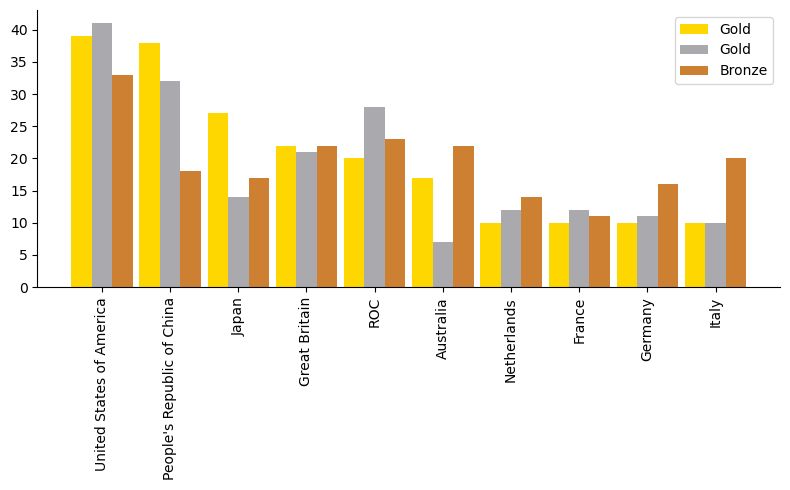

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
barra_ancho = 0.3
x = df["Rank"]
#x = np.arange(df.index.size)
y1=ax.bar(x-barra_ancho, df["Gold"], barra_ancho, label="Gold", color="#ffd700")
y2=ax.bar(x, df["Silver"], barra_ancho, label="Gold", color="#aaa9ad")
y3=ax.bar(x+barra_ancho, df["Bronze"], barra_ancho, label="Bronze", color="#cd7f32")

ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90)
ax.legend()

#ax.bar_label(ba1, padding=3)
#ax.bar_label(silver_medals, padding=3)
#ax.bar_label(bronze_medals, padding=3)

#ax.bar_label(ax.containers[0])
ax.spines["right"].set_visible(False) # ocultar borde derecho
ax.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout() # ajustar elementos al tamaño de la figura
